In [1]:
#import basic libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
#Loading Datasets titanic
data_titanic=pd.read_csv("titanic-passengers.csv",sep=";")


# Understadning of Data

In [3]:
print(f"Total {data_titanic.shape} Columns and Rows in the dataset titanic")


Total (891, 12) Columns and Rows in the dataset titanic


In [4]:
#Showing Data
data_titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [5]:
columns=data_titanic.columns.to_list() #Creating a list of columns
print(columns)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [6]:
#Getting Basic Information of Data
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


# Data Preprocessing



In [7]:
#Finding Missing Values
data_titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,True,False,False,False,False,True,False


In [8]:
data_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

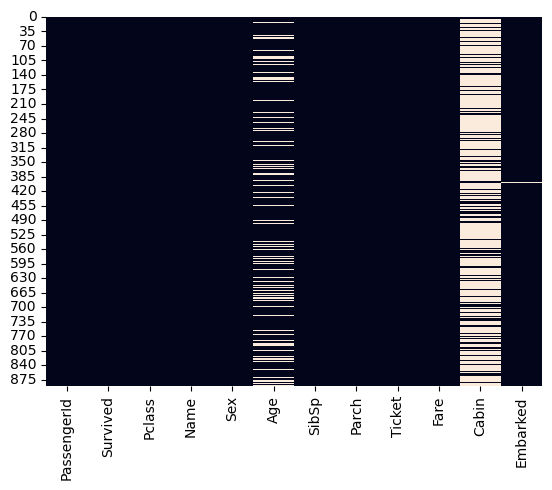

In [9]:
sns.heatmap(data_titanic.isnull(),cbar=False) # visulation missing value

In [10]:
((data_titanic.isnull().sum()/data_titanic.shape[0])*100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [11]:
#Replacing Missing Values
data_titanic["Age"].fillna(data_titanic["Age"].mean(),inplace=True)
data_titanic["Cabin"].fillna("U",inplace=True) #'U'= Unknow
data_titanic["Embarked"].fillna(str(data_titanic["Embarked"].mode()),inplace=True)

In [12]:
data_titanic.isnull().sum().sum()

0

In [13]:
#Transform all the object type values to numerical values
encoder=LabelEncoder()
data_titanic["Survived"]=encoder.fit_transform(data_titanic["Survived"])
data_titanic["Sex"]=encoder.fit_transform(data_titanic["Sex"])
data_titanic["Embarked"]=encoder.fit_transform(data_titanic["Embarked"])
data_titanic["Cabin"]=data_titanic["Cabin"].str[0].replace("[0-9]","",regex=True)
data_titanic["Cabin"]=encoder.fit_transform(data_titanic["Cabin"])



In [14]:
#Delete two columns:PassengerId and Ticket
data_titanic=data_titanic.drop(["PassengerId","Ticket"],axis=1)

In [15]:
data_titanic.set_index("Name",inplace=True)
data_titanic.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Name,,,,,,,,,
"Collander, Mr. Erik Gustaf",0,2,1,28.000000,0,0,13.0000,8,3
"Moen, Mr. Sigurd Hansen",0,3,1,25.000000,0,0,7.6500,5,3
"Jensen, Mr. Hans Peder",0,3,1,20.000000,0,0,7.8542,8,3
"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,3,0,29.000000,0,4,21.0750,8,3
"Davidson, Mr. Thornton",0,1,1,31.000000,1,0,52.0000,1,3
"Gustafsson, Mr. Anders Vilhelm",0,3,1,37.000000,2,0,7.9250,8,3
"Patchett, Mr. George",0,3,1,19.000000,0,0,14.5000,8,3
"Nakid, Miss. Maria (""Mary"")",1,3,0,1.000000,0,2,15.7417,8,1
"Lovell, Mr. John Hall (""Henry"")",0,3,1,20.500000,0,0,7.2500,8,3


# Visualization DataSet

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

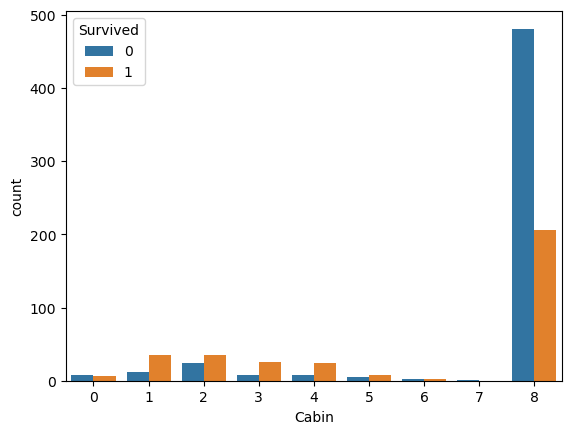

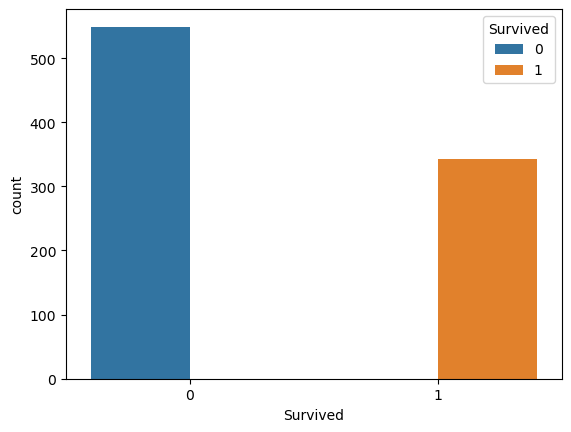

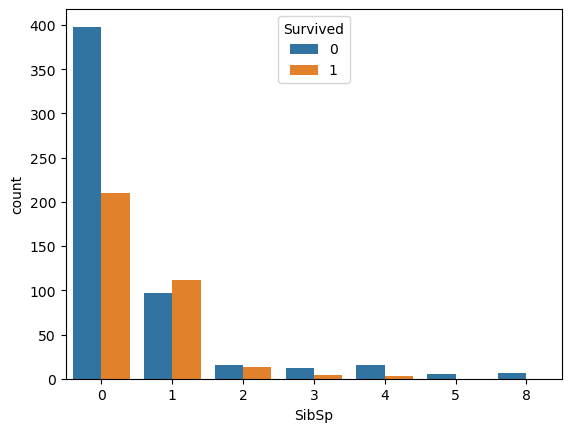

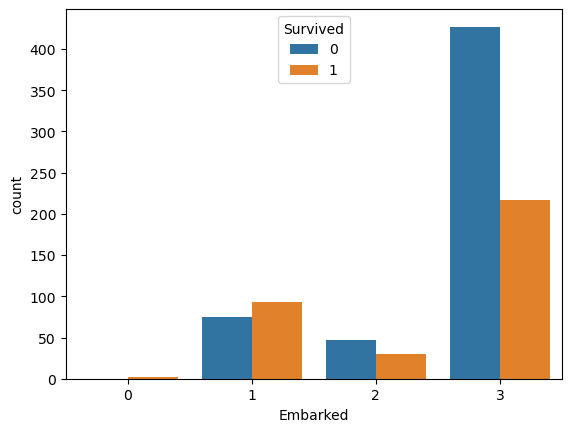

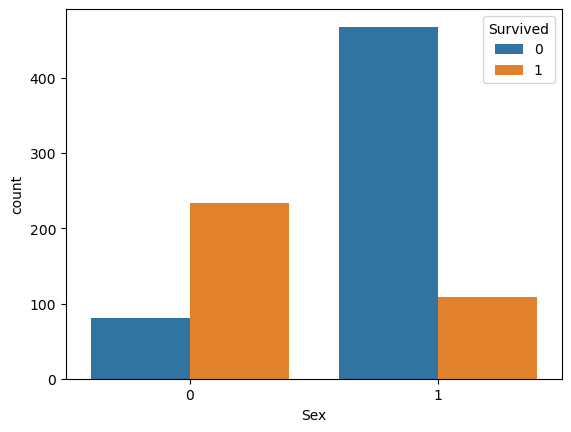

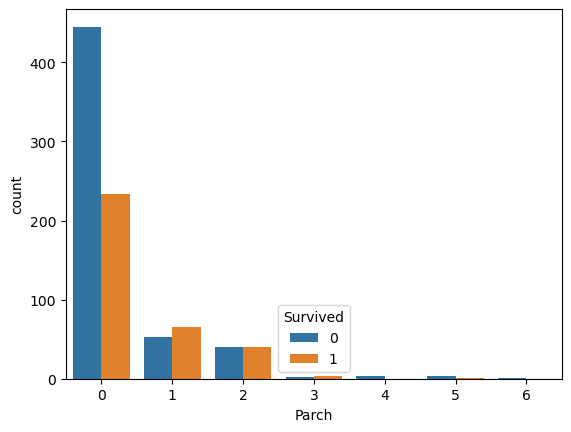

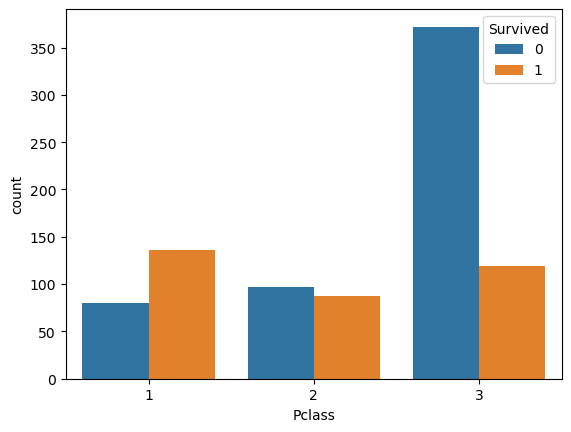

In [16]:
#visualization categorycal variable
for column in ["Cabin","Survived","SibSp","Embarked","Sex","Parch","Pclass"]:
    plt.figure()
    sns.countplot(data_titanic[column],hue="Survived",data=data_titanic)
    

<AxesSubplot:xlabel='Age', ylabel='Count'>

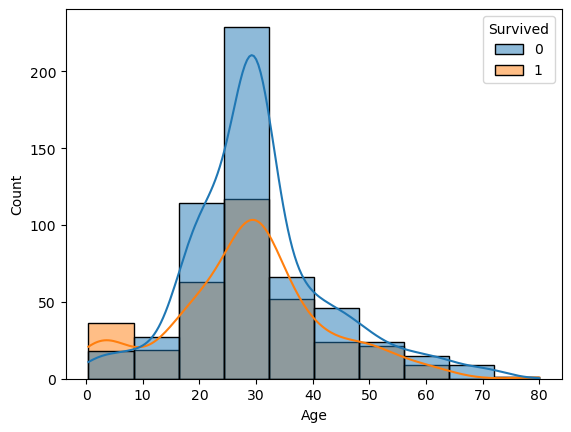

In [17]:
#visualuzzation numerical variable
sns.histplot(data=data_titanic,x=data_titanic['Age'],hue="Survived",kde=True,bins=10)


<AxesSubplot:xlabel='Fare', ylabel='Count'>

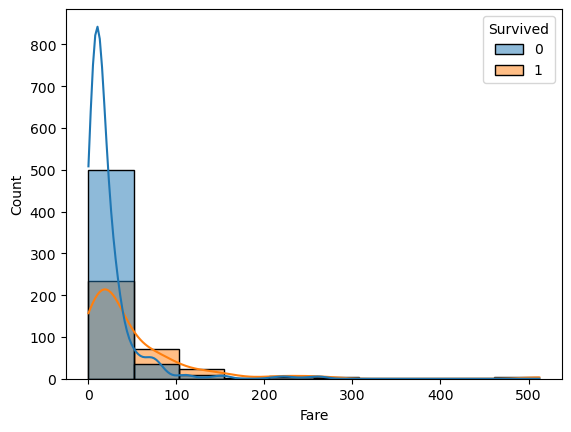

In [18]:
sns.histplot(data=data_titanic,x=data_titanic['Fare'],hue="Survived",kde=True,bins=10)


<AxesSubplot:xlabel='Sex', ylabel='Age'>

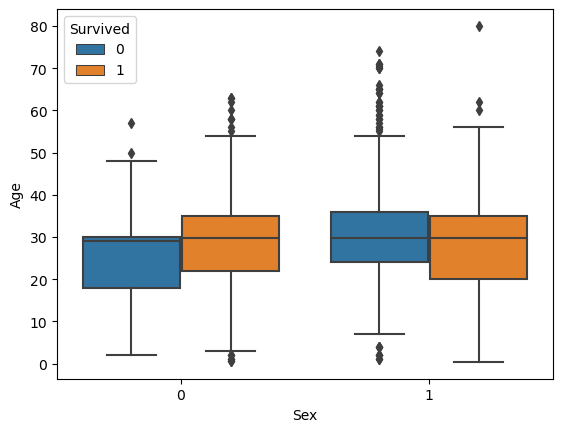

In [19]:
#Visualize the correlation between Sex and Age 
sns.boxplot(x="Sex",y="Age",hue="Survived",data=data_titanic)

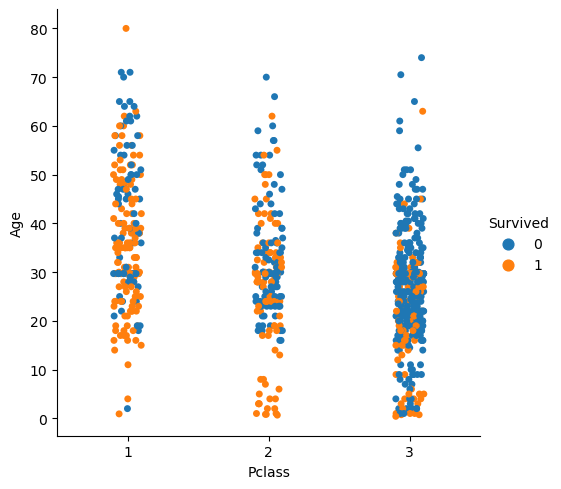

In [20]:
#Visualize the relation between Sex and Pclass 
sns.catplot(x="Pclass",y="Age",hue="Survived",data=data_titanic)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

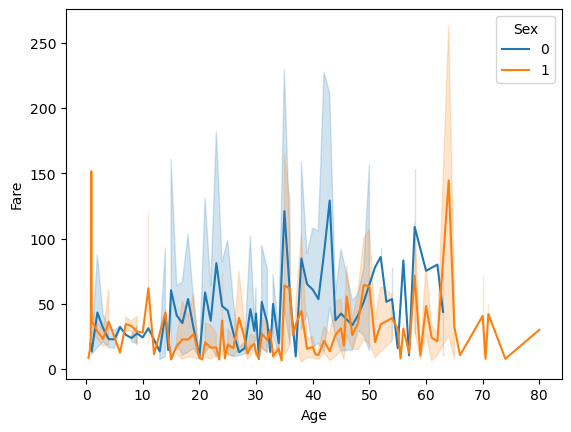

In [21]:
#Visualize the relation between Age ,Fare and Sex 
sns.lineplot(x='Age',y='Fare',data=data_titanic,hue='Sex')


In [22]:
def plot_correlation_map(data):

    corr = data.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

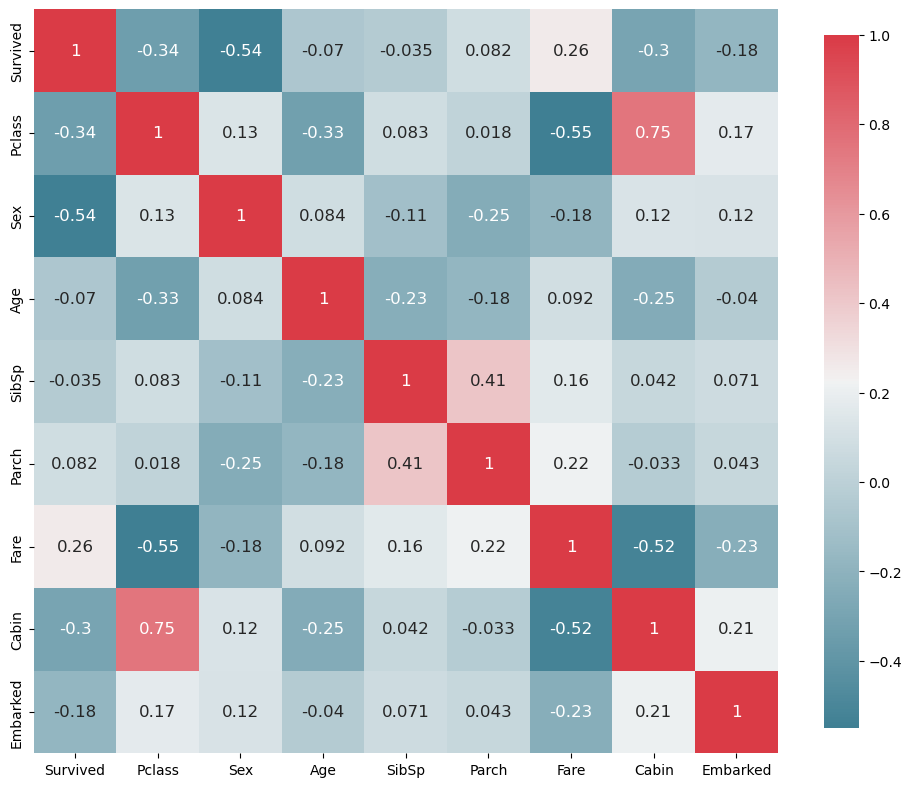

In [23]:
plot_correlation_map(data_titanic)

In [24]:
#the relation between Pclass and Survived 
data_titanic[["Survived","Pclass","Sex"]].groupby(["Sex","Pclass"]).mean()

Survived
Sex Pclass          
0   1       0.968085
    2       0.921053
    3       0.500000
1   1       0.368852
    2       0.157407
    3       0.135447